## <font size=5> <strong>Heart Disease Prediction


## I. Importing essential libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart_disease_uci.csv', 'sample_data']


## II. Importing and understanding our dataset

In [3]:
dataset = pd.read_csv("heart_disease_uci.csv")

In [4]:
dataset.shape

(920, 16)

In [5]:
dataset.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
dataset.sample(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
602,603,38,Female,Switzerland,asymptomatic,110.0,0.0,False,normal,156.0,False,0.0,flat,NaN,normal,1
83,84,68,Male,Cleveland,non-anginal,180.0,274.0,True,lv hypertrophy,150.0,True,1.6,flat,0.0,reversable defect,3
497,498,38,Male,Hungary,asymptomatic,110.0,196.0,False,normal,166.0,False,0.0,NaN,NaN,NaN,1
704,705,65,Male,Switzerland,asymptomatic,115.0,0.0,False,normal,93.0,True,0.0,flat,NaN,reversable defect,1
349,350,41,Female,Hungary,atypical angina,125.0,184.0,False,normal,180.0,False,0.0,NaN,NaN,NaN,0


#### Description of Dataset

In [7]:
dataset.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [9]:
info = ["id(Unique for each patient)","age","1: male, 0: female", "dataset from Cleveland, Hungary, VA Long Beach, Switzerland",
        "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure",
        " serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)",
        " maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy",
        "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect",
        "target value:  0: No Heart Disease 1: Mild Heart Disease 2: Moderate Heart Disease 3: Severe Heart Disease,4: Critical Heart Disease"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

id:			id(Unique for each patient)
age:			age
sex:			1: male, 0: female
dataset:			dataset from Cleveland, Hungary, VA Long Beach, Switzerland
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalch:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
num:			target value:  0: No Heart Disease 1: Mild Heart Disease 2: Moderate Heart Disease 3: Severe Heart Disease,4: Critical Heart Disease


#### Analysing the 'target' variable

In [10]:
dataset["num"].describe()

,num
count,920.000000
mean,0.995652
std,1.142693
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


In [11]:
dataset["num"].unique()

array([0, 2, 1, 3, 4])

Univariate Analysis

Age Column

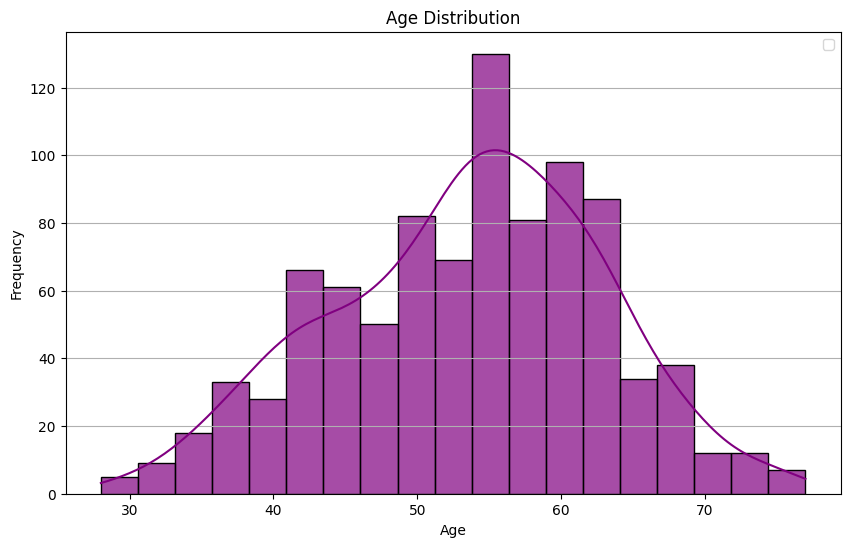

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(dataset.age, color="purple",kde=True, alpha=0.7)
plt.legend()
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Mean of age column: 53.51
Median of age column: 54.0
Mode of age column: 54


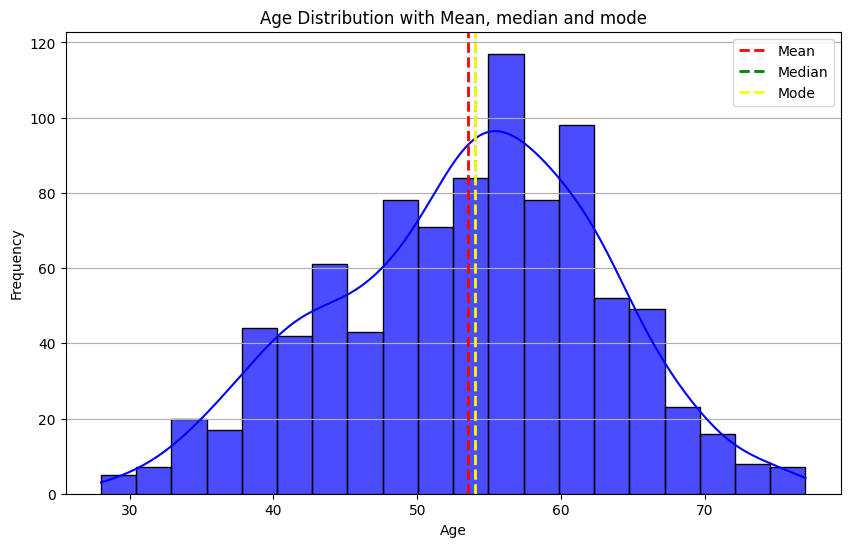

In [13]:
#plotting mean, median and mode of the age column
plt.figure(figsize=(10,6))
sns.histplot(dataset['age'], bins=20, color="blue", kde=True, alpha=0.7)
plt.axvline(dataset['age'].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean")
plt.axvline(dataset['age'].median(), color="green", linestyle="dashed", linewidth=2, label="Median")
plt.axvline(dataset['age'].mode()[0], color="yellow", linestyle="dashed", linewidth=2, label="Mode")
plt.title("Age Distribution with Mean, median and mode")
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y')


print(f"Mean of age column: {round(dataset['age'].mean(),2)}")
print(f"Median of age column: {dataset['age'].median()}")
print(f"Mode of age column: {dataset['age'].mode()[0]}")
plt.show()

Insights:
1. Minimum age to have a heart disease is 28 years.
2. Maximum people get heart disease at age 55-58.

In [14]:
sex_count = dataset['sex'].value_counts()
sex_percentage = round(sex_count*100/ len(dataset),2)
print(pd.DataFrame({'Count': sex_count, 'Percentage': sex_percentage}))

        Count  Percentage
sex                      
Male      726       78.91
Female    194       21.09


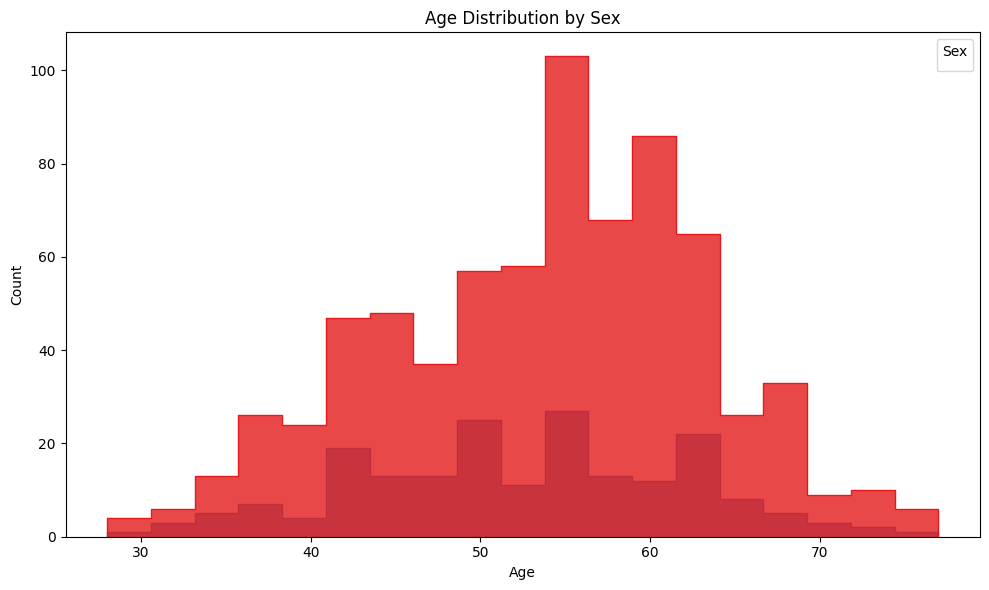

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data= dataset, x='age', hue='sex', kde=False, stat='count', palette='Set1', element='step', multiple='layer', alpha=0.8)

plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

Insights:
1. Most of the males and females get heart disease around 54-55 age.
2. Males have higher chances of getting a heart disease.


Dataset column

In [16]:
print(dataset['dataset'].unique())

['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


In [17]:
dataset['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


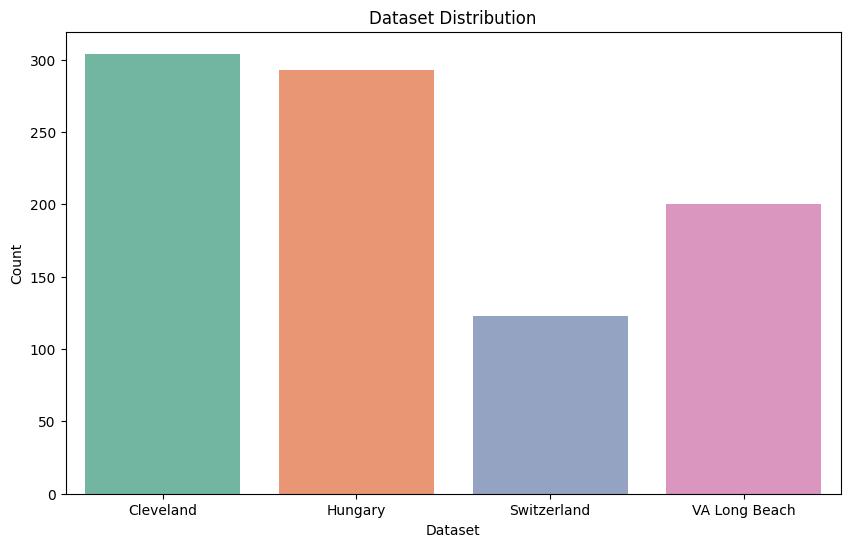

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x= dataset['dataset'], palette='Set2')
plt.title('Dataset Distribution')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.show()

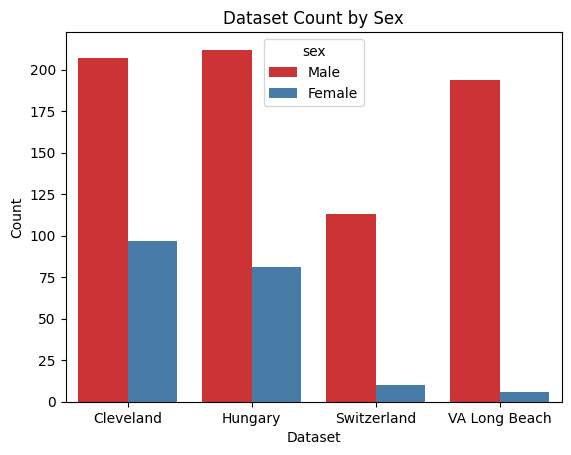

In [19]:
sns.countplot(data=dataset, x='dataset', hue='sex', palette='Set1')
plt.title('Dataset Count by Sex')
plt.xlabel('Dataset')
plt.ylabel('Count')

plt.show()

*   **Cleveland** : Males=207, Females=97
*   **Hungary**: Males=212, Females=81
*   **Switzerland**: Males=113,Females=10
*   **VA Long Beach**: Males=194,Females=6

1. Hungary has the highest number of males and Switzerland has the least amount of males to get a heart disease.

2. Cleaveland has the highest number of males and VA Long Beach has the least amount of males to get a heart disease.

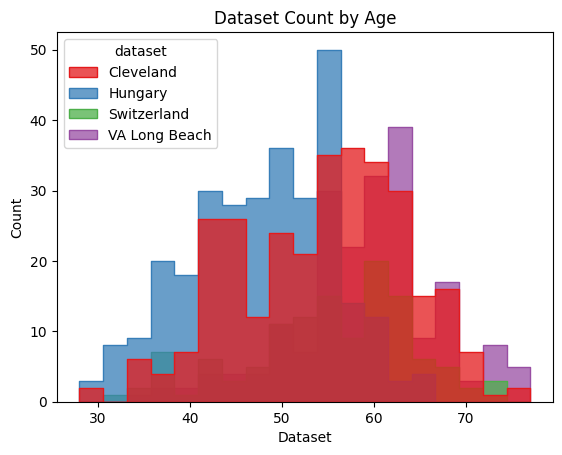

In [20]:
sns.histplot(data=dataset, x='age', hue='dataset', palette='Set1', multiple='layer', element='step', alpha=0.75, stat='count')
plt.title('Dataset Count by Age')
plt.xlabel('Dataset')
plt.ylabel('Count')

plt.show()

In [21]:
#cp column
print(dataset['cp'].unique())
print(dataset['cp'].value_counts())

['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


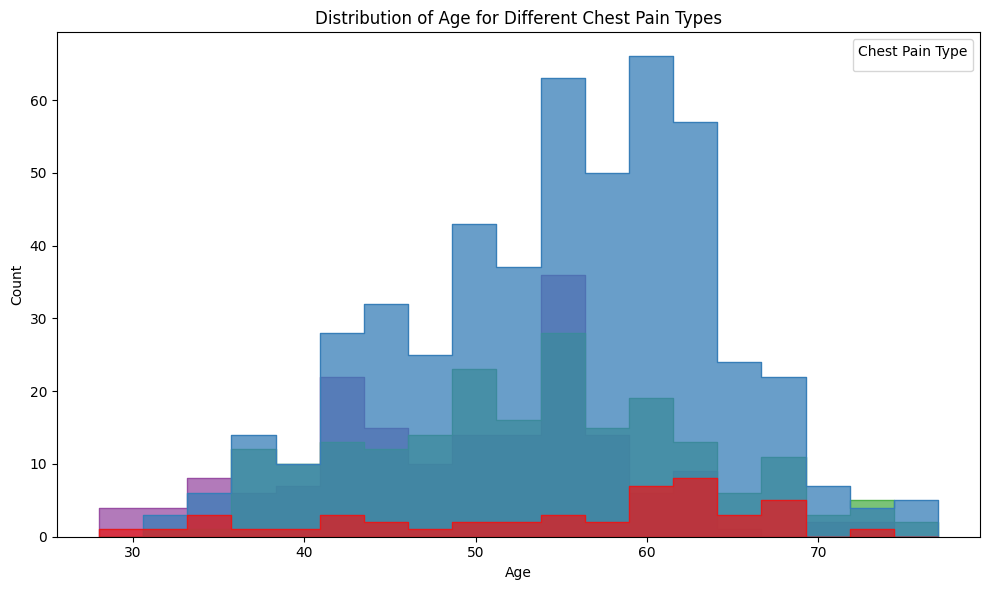

In [22]:
plt.figure(figsize=(10, 6))

sns.histplot(data=dataset, x='age', hue='cp', multiple='layer',
             element='step', palette='Set1', alpha=0.75, stat='count')

plt.title('Distribution of Age for Different Chest Pain Types')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type')
plt.tight_layout()
plt.show()

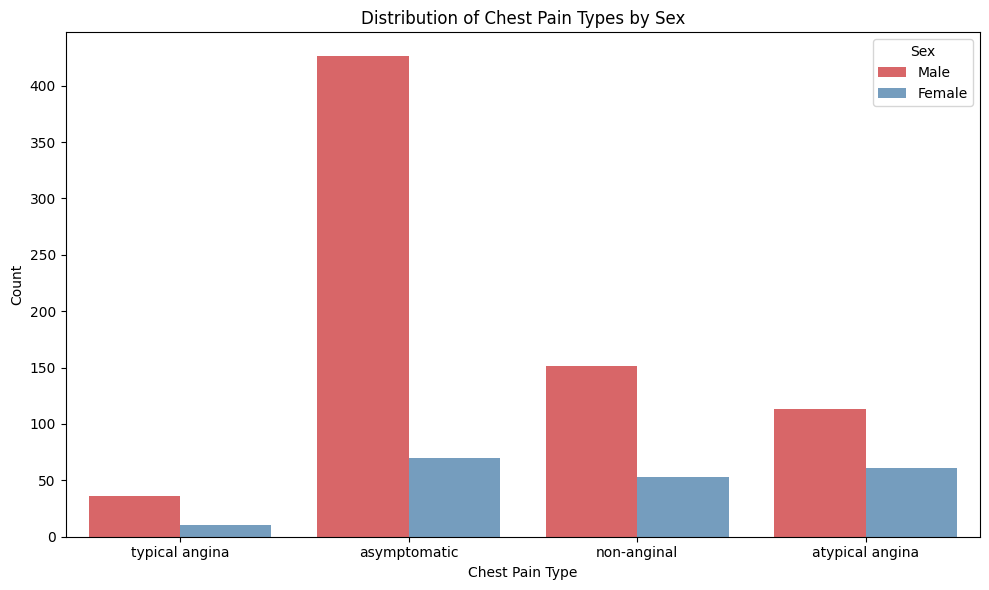

In [23]:
plt.figure(figsize=(10, 6))

sns.countplot(data=dataset, x='cp', hue='sex', palette='Set1', alpha=0.75)

plt.title('Distribution of Chest Pain Types by Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

1. Asymptomatic is the most common chest pain type. It is more in males with over 400 male cases.
2. Typical Angina is rare, especially among females.
3. Non-anginal and Atypical Angina is somewhat evenly distributed.  

In [24]:
# print(dataset.corr()["num"].abs().sort_values(ascending=False))

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

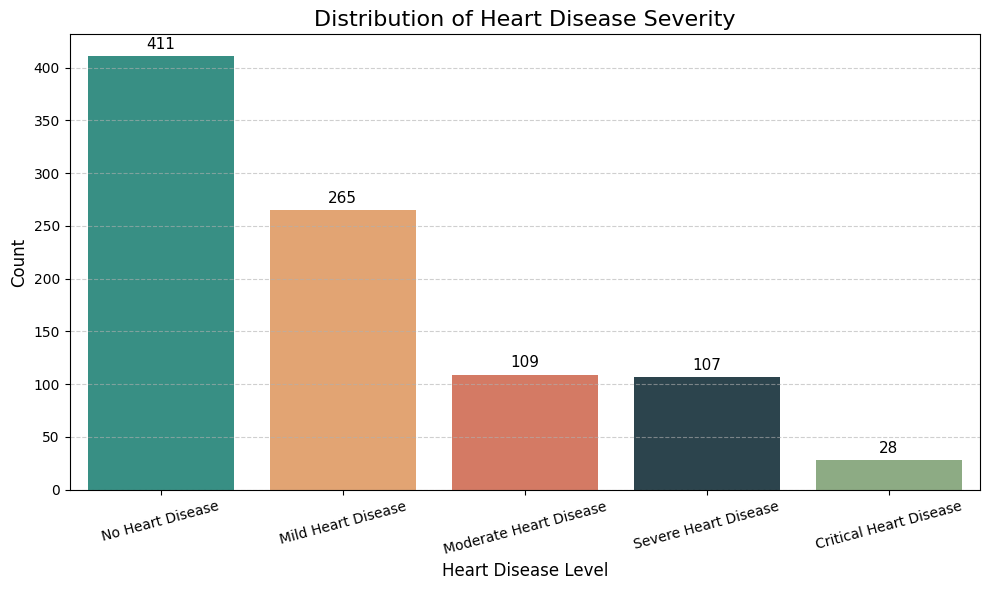

In [24]:
num_labels = {
    0: 'No Heart Disease',
    1: 'Mild Heart Disease',
    2: 'Moderate Heart Disease',
    3: 'Severe Heart Disease',
    4: 'Critical Heart Disease'
}
mapped = dataset['num'].map(num_labels)
num_counts = mapped.value_counts().reset_index()
num_counts.columns = ['Heart Disease Level', 'Count']

# Colors for bars
colors = ['#2a9d8f', '#f4a261', '#e76f51', '#264653', '#8ab17d']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Heart Disease Level',
    y='Count',
    data=num_counts,
    palette=colors
)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=11, padding=3)

# Final touches
plt.title('Distribution of Heart Disease Severity', fontsize=16)
plt.xlabel('Heart Disease Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [25]:
df= dataset.copy()
df['num'] = df['num'].apply(lambda x: 1 if x>0 else 0)

In [26]:
#Presence and Absence of Heart Disease
disease_count = df['num'].value_counts()

In [27]:
print("Percentage of patience without heart problems: "+str(round(disease_count[0]*100/len(df),2)))
print("Percentage of patience with heart problems: "+str(round(disease_count[1]*100/len(df),2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 44.67
Percentage of patience with heart problems: 55.33


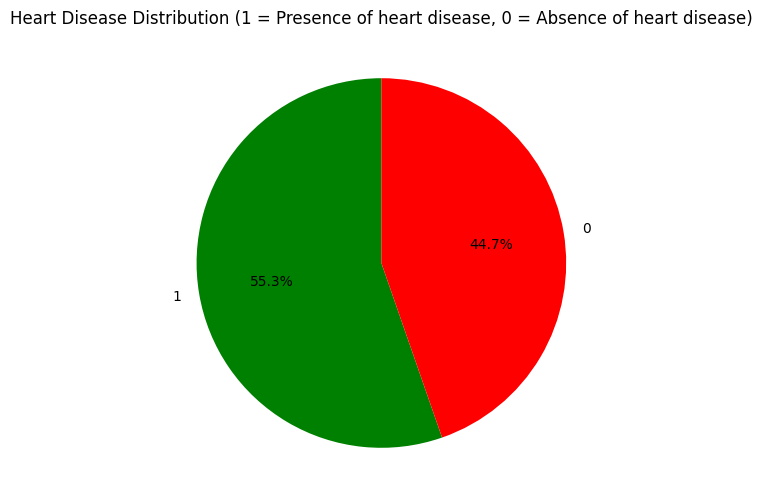

In [28]:
plt.figure(figsize=(6, 6))
plt.pie(disease_count, labels=disease_count.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Heart Disease Distribution (1 = Presence of heart disease, 0 = Absence of heart disease)')
plt.show()

In [29]:
def heart_disease_corr(type, col_name):
    # count occurrences using .size()
    _disease_counts = df.groupby([type, 'num']).size().reset_index(name='Count')

    # rename columns for clarity
    _disease_counts.columns = [col_name, 'Heart Disease', 'Count']

    # plot a grouped bar chart
    plt.figure(figsize=(8, 6))
    sns.barplot(data=_disease_counts, x=col_name, y='Count', hue='Heart Disease', palette=['green', 'red'])

    plt.title(f'Distribution of {col_name} and Heart Disease')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.legend(title='Presence of heart disease: green = no, red = yes')
    plt.tight_layout()
    plt.show()


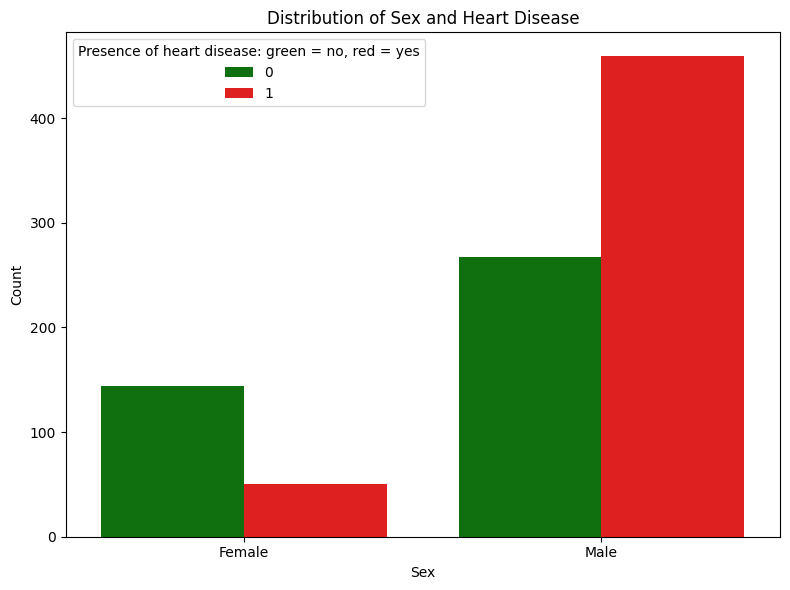

In [30]:
heart_disease_corr('sex', 'Sex')

In [31]:
print(dataset['trestbps'].describe())

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


In [32]:
#Missing values in trestbps column
missing_trestbps = dataset['trestbps'].isnull().sum()
print("Missing Values in trestbps: ", missing_trestbps)
print(f"Percentage of missing values: {round(missing_trestbps*100/len(dataset),2)}")

Missing Values in trestbps:  59
Percentage of missing values: 6.41


In [33]:
# Impute the missing values in the trestbps column using iterative imputer
imputer_1 = IterativeImputer(max_iter=10, random_state=42)
dataset['trestbps'] = imputer_1.fit_transform(dataset[['trestbps']])
# Check for missing values in the trestbps column again
missing_percentage = (dataset['trestbps'].isnull().sum() / len(dataset)) * 100
print(f"Number of missing values in the 'trestbps' column after imputation: {dataset['trestbps'].isnull().sum()} ({missing_percentage:.2f}%)")

Number of missing values in the 'trestbps' column after imputation: 0 (0.00%)


In [34]:
#Missing Values in columns
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values in the dataset:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

Missing Values in the dataset:
          Missing Values  Percentage
trestbps              59    6.413043
chol                  30    3.260870
fbs                   90    9.782609
restecg                2    0.217391
thalch                55    5.978261
exang                 55    5.978261
oldpeak               62    6.739130
slope                309   33.586957
ca                   611   66.413043
thal                 486   52.826087


In [35]:
# Impute missing values of numerical columns using iterative imputer
imputer_2 = IterativeImputer(max_iter=10, random_state=42)

# Select only numeric columns for imputation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = imputer_2.fit_transform(df[numeric_columns])

# Check for missing values in the dataset again
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(df)) * 100
missing_values = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
# Display the missing values
print("Missing values in the dataset after imputation:")
print(missing_values)

Missing values in the dataset after imputation:
         Missing Values  Percentage
fbs                  90    9.782609
restecg               2    0.217391
exang                55    5.978261
slope               309   33.586957
thal                486   52.826087


In [36]:
categorical_cols = ['fbs', 'restecg', 'exang', 'slope','thal']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [37]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(df)) * 100
missing_values = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
# Display the missing values
print("Missing values in the dataset after imputation:")
print(missing_values)

Missing values in the dataset after imputation:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


Dealing with Outliers


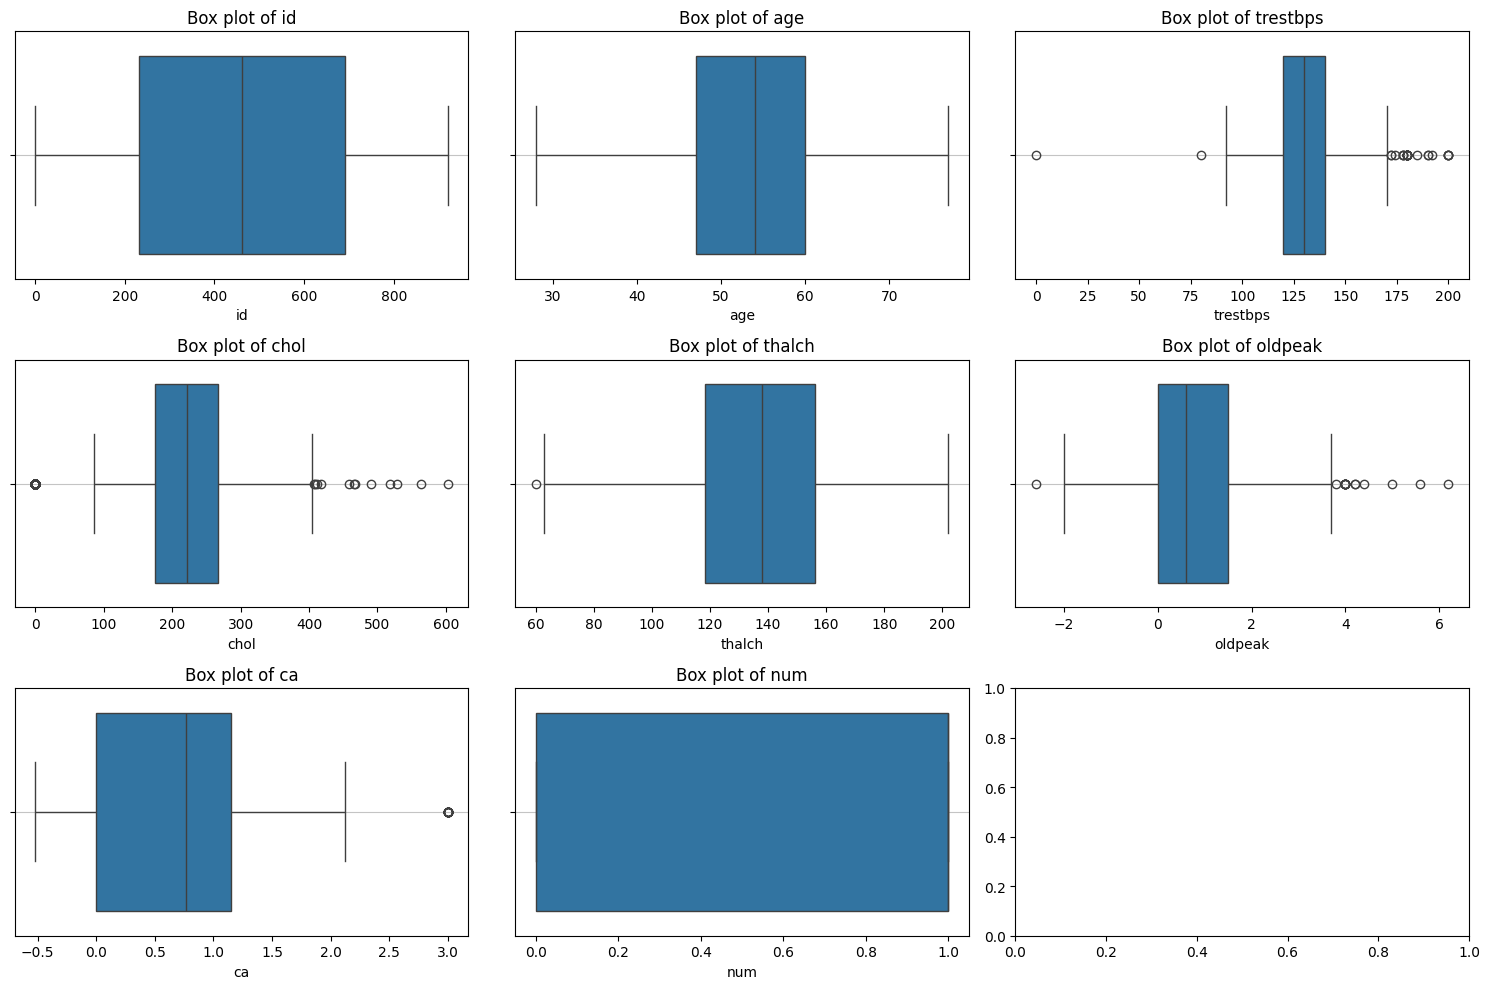

In [38]:
# creat box plots for all the numeric columns using for loop and subplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Create box plots for all numeric columns using Plotly
# Create individual box plots for each numeric column using Plotly
# Create individual box plots for each numeric column using Plotly subplots

# Create a subplot figure
fig = make_subplots(rows=len(numeric_columns), cols=1, shared_xaxes=True, vertical_spacing=0.02)

# Add a box plot for each numeric column
for i, col in enumerate(numeric_columns):
    fig.add_trace(
        px.box(df, y=col, points="all").data[0],
        row=i + 1,
        col=1
    )

# Update layout
fig.update_layout(
    height=300 * len(numeric_columns),  # Adjust height based on the number of subplots
    title_text="Box Plots of Numeric Columns",
    showlegend=False
)

fig.show()

In [40]:
df[df['trestbps']==0]
df = df[df['trestbps']!=0]

## IV. Train Test split

In [65]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,1.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,1.174808,normal,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,136.736446,139.0,False,st-t abnormality,118.742680,False,0.403875,flat,0.745017,normal,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.122064,fixed defect,1.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,141.117886,385.0,True,lv hypertrophy,123.314433,False,0.609814,flat,0.741225,normal,0.0


In [121]:
df_train = df.copy()

In [122]:
df_train

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,1.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,1.174808,normal,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,136.736446,139.0,False,st-t abnormality,118.742680,False,0.403875,flat,0.745017,normal,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.122064,fixed defect,1.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,141.117886,385.0,True,lv hypertrophy,123.314433,False,0.609814,flat,0.741225,normal,0.0


In [123]:
df_train.drop(['id','dataset'],axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63.0,Male,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,67.0,Male,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,1.0
2,67.0,Male,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,37.0,Male,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,41.0,Female,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,Female,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,1.174808,normal,1.0
916,62.0,Male,typical angina,136.736446,139.0,False,st-t abnormality,118.742680,False,0.403875,flat,0.745017,normal,0.0
917,55.0,Male,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.122064,fixed defect,1.0
918,58.0,Male,asymptomatic,141.117886,385.0,True,lv hypertrophy,123.314433,False,0.609814,flat,0.741225,normal,0.0


In [124]:
categorical_columns = df_train.select_dtypes(include=['object','bool']).columns.tolist()
categorical_columns


['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [125]:
numeric_features  = df_train.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_features

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

In [126]:
df_train

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,1.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,1.174808,normal,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,136.736446,139.0,False,st-t abnormality,118.742680,False,0.403875,flat,0.745017,normal,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.122064,fixed defect,1.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,141.117886,385.0,True,lv hypertrophy,123.314433,False,0.609814,flat,0.741225,normal,0.0


In [127]:
# Unique Values
# df1['sex'].unique()
for col in categorical_columns:
    print(f'{col}:{df_train[col].unique()}')


sex:['Male' 'Female']
dataset:['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp:['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs:[ True False]
restecg:['lv hypertrophy' 'normal' 'st-t abnormality']
exang:[False  True]
slope:['downsloping' 'flat' 'upsloping']
thal:['fixed defect' 'normal' 'reversable defect']


In [128]:
label_encoder = preprocessing.LabelEncoder()
for col in categorical_columns:
    df_train[col]=label_encoder.fit_transform(df_train[col])
    print(f'{col}:{df_train[col].unique()}')

sex:[1 0]
dataset:[0 1 2 3]
cp:[3 0 2 1]
fbs:[1 0]
restecg:[0 1 2]
exang:[0 1]
slope:[0 1 2]
thal:[0 1 2]


In [129]:
df_train

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,1,0,3,145.000000,233.0,1,0,150.000000,0,2.300000,0,0.000000,0,0.0
1,2.0,67.0,1,0,0,160.000000,286.0,0,0,108.000000,1,1.500000,1,3.000000,1,1.0
2,3.0,67.0,1,0,0,120.000000,229.0,0,0,129.000000,1,2.600000,1,2.000000,2,1.0
3,4.0,37.0,1,0,2,130.000000,250.0,0,1,187.000000,0,3.500000,0,0.000000,1,0.0
4,5.0,41.0,0,0,1,130.000000,204.0,0,0,172.000000,0,1.400000,2,0.000000,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,0,3,0,127.000000,333.0,1,2,154.000000,0,0.000000,1,1.174808,1,1.0
916,917.0,62.0,1,3,3,136.736446,139.0,0,2,118.742680,0,0.403875,1,0.745017,1,0.0
917,918.0,55.0,1,3,0,122.000000,223.0,1,2,100.000000,0,0.000000,1,1.122064,0,1.0
918,919.0,58.0,1,3,0,141.117886,385.0,1,0,123.314433,0,0.609814,1,0.741225,1,0.0


In [130]:
df_train = df_train.drop(['id','dataset'],axis=1)

In [131]:
df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63.0,1,3,145.000000,233.0,1,0,150.000000,0,2.300000,0,0.000000,0,0.0
1,67.0,1,0,160.000000,286.0,0,0,108.000000,1,1.500000,1,3.000000,1,1.0
2,67.0,1,0,120.000000,229.0,0,0,129.000000,1,2.600000,1,2.000000,2,1.0
3,37.0,1,2,130.000000,250.0,0,1,187.000000,0,3.500000,0,0.000000,1,0.0
4,41.0,0,1,130.000000,204.0,0,0,172.000000,0,1.400000,2,0.000000,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0,0,127.000000,333.0,1,2,154.000000,0,0.000000,1,1.174808,1,1.0
916,62.0,1,3,136.736446,139.0,0,2,118.742680,0,0.403875,1,0.745017,1,0.0
917,55.0,1,0,122.000000,223.0,1,2,100.000000,0,0.000000,1,1.122064,0,1.0
918,58.0,1,0,141.117886,385.0,1,0,123.314433,0,0.609814,1,0.741225,1,0.0


In [132]:
for col in df_train:
  df_train[col]= df_train[col].astype(int)

In [133]:
df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2,0,0,0,0
1,67,1,0,160,286,0,0,108,1,1,1,3,1,1
2,67,1,0,120,229,0,0,129,1,2,1,2,2,1
3,37,1,2,130,250,0,1,187,0,3,0,0,1,0
4,41,0,1,130,204,0,0,172,0,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,0,127,333,1,2,154,0,0,1,1,1,1
916,62,1,3,136,139,0,2,118,0,0,1,0,1,0
917,55,1,0,122,223,1,2,100,0,0,1,1,0,1
918,58,1,0,141,385,1,0,123,0,0,1,0,1,0


In [134]:
predictors = df_train.drop('num',axis=1)
target = df_train['num']

In [135]:
predictors

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2,0,0,0
1,67,1,0,160,286,0,0,108,1,1,1,3,1
2,67,1,0,120,229,0,0,129,1,2,1,2,2
3,37,1,2,130,250,0,1,187,0,3,0,0,1
4,41,0,1,130,204,0,0,172,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,0,127,333,1,2,154,0,0,1,1,1
916,62,1,3,136,139,0,2,118,0,0,1,0,1
917,55,1,0,122,223,1,2,100,0,0,1,1,0
918,58,1,0,141,385,1,0,123,0,0,1,0,1


In [136]:
target

,num
0,0
1,1
2,1
3,0
4,0
...,...
915,1
916,0
917,1
918,0


In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [138]:
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
378,45,1,2,135,206,0,1,110,0,0,1,0,1
356,42,1,1,120,196,0,1,150,0,0,1,0,1
738,63,1,0,126,0,0,2,120,0,1,0,0,1
85,44,1,2,140,235,0,0,180,0,0,2,0,1
427,52,0,1,140,209,0,1,140,0,0,1,0,1


In [139]:
X_train.shape

(735, 13)

In [140]:
X_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
306,30,0,3,170,237,0,2,170,0,0,1,0,0
711,68,1,0,135,0,0,2,120,1,0,2,1,2
298,45,1,3,110,264,0,1,132,0,1,1,0,2
466,55,1,2,120,220,0,0,134,0,0,1,0,1
253,51,0,2,120,295,0,0,157,0,0,2,0,1


In [141]:
X_test.shape

(184, 13)

In [142]:
Y_train.head(5)

,num
378,0
356,0
738,0
85,0
427,0


In [143]:
Y_train.shape

(735,)

In [144]:
Y_test.shape

(184,)

## V. Model Fitting

In [145]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

### Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [147]:
Y_pred_lr.shape

(184,)

In [148]:
cm = confusion_matrix(Y_test, Y_pred_lr)
cm

array([[68, 12],
       [12, 92]])

<Figure size 400x300 with 0 Axes>

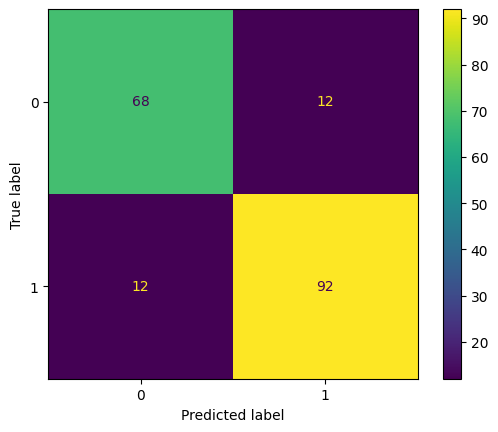

In [149]:
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [150]:

print("Classification Report:\n", classification_report(Y_test, Y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        80
           1       0.88      0.88      0.88       104

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [151]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.96 %


### Naive Bayes

In [152]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [153]:
Y_pred_nb.shape

(184,)

In [154]:
cm = confusion_matrix(Y_test, Y_pred_nb)
cm

array([[62, 18],
       [14, 90]])

<Figure size 400x300 with 0 Axes>

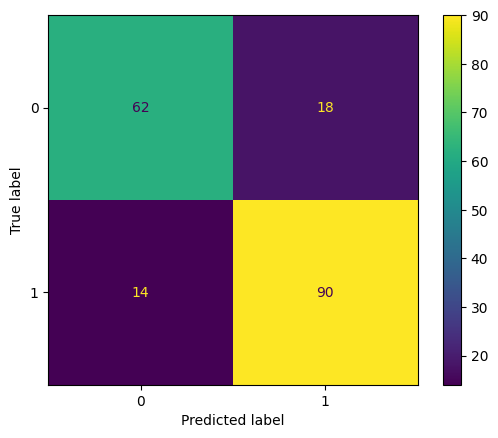

In [155]:
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [156]:
print("Classification Report:\n", classification_report(Y_test, Y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.79        80
           1       0.83      0.87      0.85       104

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [157]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 82.61 %


### SVM

In [158]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [159]:
Y_pred_svm.shape

(184,)

In [160]:
cm = confusion_matrix(Y_test, Y_pred_svm)
cm

array([[66, 14],
       [13, 91]])

<Figure size 400x300 with 0 Axes>

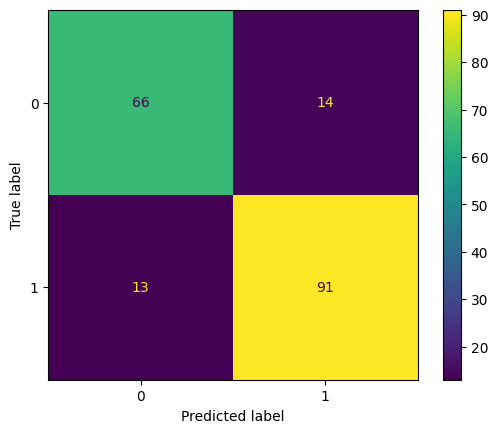

In [161]:
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [162]:

print("Classification Report:\n", classification_report(Y_test, Y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        80
           1       0.87      0.88      0.87       104

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [163]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 85.33 %


### K Nearest Neighbors

In [164]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [165]:
Y_pred_knn.shape

(184,)

In [166]:
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[48, 32],
       [22, 82]])

<Figure size 400x300 with 0 Axes>

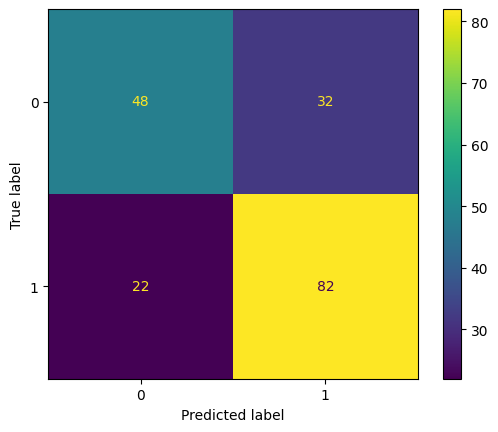

In [167]:
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [168]:
print("Classification Report:\n", classification_report(Y_test, Y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64        80
           1       0.72      0.79      0.75       104

    accuracy                           0.71       184
   macro avg       0.70      0.69      0.70       184
weighted avg       0.70      0.71      0.70       184



In [169]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 70.65 %


### Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [171]:
print(Y_pred_dt.shape)

(184,)


In [172]:
cm = confusion_matrix(Y_test, Y_pred_dt)
cm

array([[70, 10],
       [12, 92]])

<Figure size 400x300 with 0 Axes>

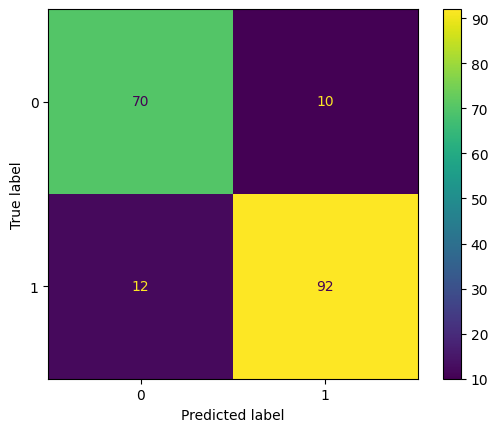

In [173]:
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [174]:
print("Classification Report:\n", classification_report(Y_test, Y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        80
           1       0.90      0.88      0.89       104

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [175]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 88.04 %


### Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [177]:
Y_pred_rf.shape

(184,)

In [178]:
cm = confusion_matrix(Y_test, Y_pred_rf)
cm

array([[70, 10],
       [ 8, 96]])

<Figure size 400x300 with 0 Axes>

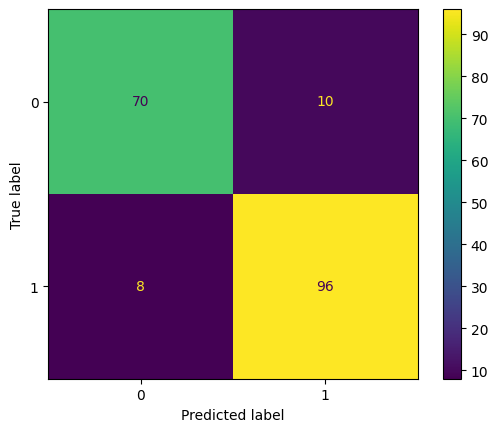

In [179]:
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [180]:
print("Classification Report:\n", classification_report(Y_test, Y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        80
           1       0.91      0.92      0.91       104

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [181]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.22 %


### Neural Network

In [182]:
from keras.models import Sequential
from keras.layers import Dense

In [183]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [184]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5628 - loss: 62.7056
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5715 - loss: 42.0734  
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5247 - loss: 27.6373 
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5359 - loss: 8.6493  
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4687 - loss: 4.0841 
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4292 - loss: 3.4952 
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4045 - loss: 3.1910 
Epoch 8/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4365 - loss: 2.7623 
Epoch 9/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4128 - loss: 2.5846
Epoch 10/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4580 - loss: 2.0653 
Epoch 11/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4902 - loss: 1.8597 
Epoch 12/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [185]:
Y_pred_nn = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [186]:
Y_pred_nn.shape

(184, 1)

In [187]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [188]:
cm = confusion_matrix(Y_test, Y_pred_nn)
cm

array([[75,  5],
       [20, 84]])

<Figure size 400x300 with 0 Axes>

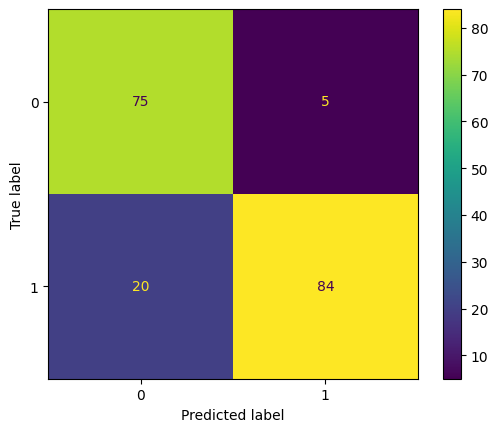

In [189]:
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [190]:
print("Classification Report:\n", classification_report(Y_test, Y_pred_nn))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        80
           1       0.94      0.81      0.87       104

    accuracy                           0.86       184
   macro avg       0.87      0.87      0.86       184
weighted avg       0.88      0.86      0.86       184



In [191]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")


The accuracy score achieved using Neural Network is: 86.41 %


## VI. Output final score

In [192]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.96 %
The accuracy score achieved using Naive Bayes is: 82.61 %
The accuracy score achieved using Support Vector Machine is: 85.33 %
The accuracy score achieved using K-Nearest Neighbors is: 70.65 %
The accuracy score achieved using Decision Tree is: 88.04 %
The accuracy score achieved using Random Forest is: 90.22 %
The accuracy score achieved using Neural Network is: 86.41 %


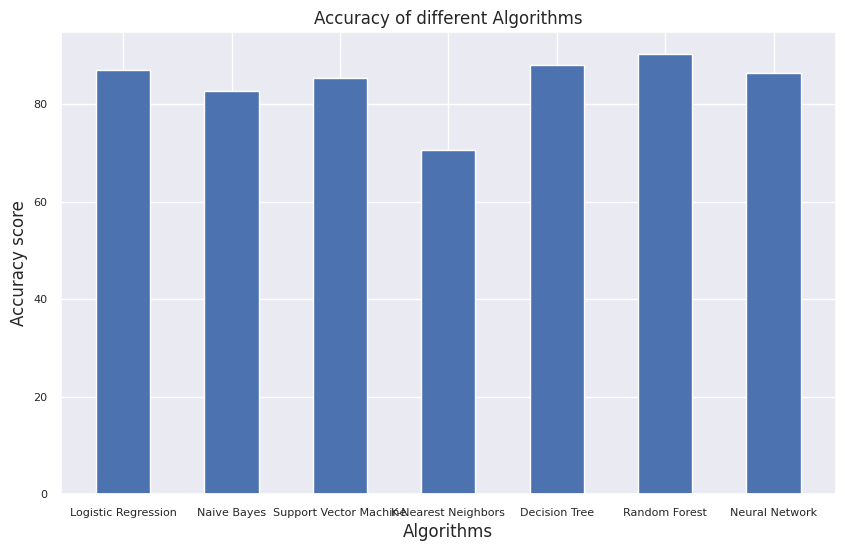

In [193]:
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Accuracy of different Algorithms")
plt.bar(algorithms, scores,width=0.5)
plt.show()

### **Random Forest** has good result as compared to other algorithms
###**Accurcy: 90.22%**